<div style="text-align:center;font-size:22pt; font-weight:bold;color:white;border:solid black 1.5pt;background-color:#1e7263;">
    Regression Models Evaludation Metrics
</div>

In [ ]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# 
#
# ==========================================================
# Lesson: Model Training Analysis and Metrics Visualization
#         California Housing Price Prediction
# ==========================================================
# ## Learning Objectives
# This guide will enable you to:
# 1. Implement and analyze regression metrics (MAE, MSE, RMSE)
# 2. Visualize training and validation metrics
# 3. Interpret model performance for house price prediction
# 4. Make data-driven decisions for model improvement
# 5. Apply model evaluation best practices
# ==========================================================
# Dataset: California Housing Prices
# Features include:
# - MedInc: Median income in block group
# - HouseAge: Median house age in block group
# - AveRooms: Average number of rooms
# - AveBedrms: Average number of bedrooms
# - Population: Block group population
# - AveOccup: Average house occupancy
# - Latitude: House block latitude
# - Longitude: House block longitude
# Target:
# - MedianHouseValue: Median house value in block group
# =======================================================================
#          Copyright © Dr. Saad Laouadi 2024
# =======================================================================

In [1]:
# 1. Environment Setup
# ------------------
import os  
from pathlib import Path
from pprint import pprint                     # This will be used for printing dicts in a nicer format
# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"   # if you have GPU

# Import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

import tensorflow as tf

# Set styling for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

Author: Dr. Saad Laouadi

Last updated: 2024-12-24

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
matplotlib: 3.9.2
seaborn   : 0.13.2
numpy     : 1.26.4
pandas    : 2.2.2
sklearn   : 1.5.1
tensorflow: 2.16.2



## Project Overview
In this hands-on project, we will develop a deep learning regression model to predict house prices in California. This project serves as an excellent introduction to regression problems in deep learning, demonstrating how neural networks can capture complex relationships in real estate data.

## Dataset Description
We will work with the California Housing dataset, which contains information about houses in California districts:
- **Demographic Features**:
  - Median Income
  - Population
  - Average Occupancy
- **Housing Features**:
  - House Age
  - Average Rooms
  - Average Bedrooms
- **Location Features**:
  - Latitude
  - Longitude
Our target variable is continuous: the median house value in the district.

## Technical Implementation
The project will utilize:
- Keras Sequential model development
- **Mean Squared Error (MSE)** loss function
- **Adam** optimizer with learning rate scheduling
- Early stopping for optimal training

## Model Architecture
We will construct a neural network with:
- An input layer matching our 8 feature dimensions
- Multiple hidden layers with ReLU activation
- A single output neuron (linear activation) for price prediction

## Learning Objectives
Through this project, you will learn:
1. How to prepare data for regression tasks
2. Feature scaling and normalization techniques
3. Designing neural networks for continuous prediction
4. Implementing and monitoring regression metrics
5. Analyzing model performance through visualizations

## Key Metrics
We will evaluate our model using:
- `Mean Absolute Error (MAE)`: Average absolute prediction error
- `Mean Squared Error (MSE)`: Average squared prediction error
- `Root Mean Squared Error (RMSE)`: Square root of MSE
- `R-squared (R²)`: Proportion of variance explained

## Additional Considerations
- Feature importance analysis
- Learning rate adjustment strategies
- Dealing with price outliers
- Cross-validation techniques

In [2]:
# ==================================================== #
#        Load and Explore the data
# ==================================================== #
# 1. Load and Prepare Data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Quick look at the data
print("Dataset Shape:", X.shape)
print("\nFeatures:")
print(X.describe())

Dataset Shape: (20640, 8)

Features:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
2

In [3]:
# ==================================================== #
#        Prepare the data for model
# ==================================================== #
# 2. Data Preprocessing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=101
                                                   )

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# ==================================================== #
#        Model Definition and Compilation
# ==================================================== #
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (8, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

# Compile with multiple metrics
model.compile(optimizer='adam',
             loss='mse',  # Mean Squared Error
             metrics=['mae', 'mse'])  # Track both MAE and MSE

In [5]:
# ==================================================== #
#        Model Training with History
# ==================================================== #
# Train the model and store history
history = model.fit(X_train_scaled, y_train,
                   validation_split=0.2,
                   epochs=100,
                   batch_size=32,
                   verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.6817 - mae: 0.8873 - mse: 1.6817 - val_loss: 0.4422 - val_mae: 0.4849 - val_mse: 0.4422
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4149 - mae: 0.4616 - mse: 0.4149 - val_loss: 0.3650 - val_mae: 0.4250 - val_mse: 0.3650
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3654 - mae: 0.4353 - mse: 0.3654 - val_loss: 0.3650 - val_mae: 0.4205 - val_mse: 0.3650
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3989 - mae: 0.4286 - mse: 0.3989 - val_loss: 0.3419 - val_mae: 0.4158 - val_mse: 0.3419
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3724 - mae: 0.4276 - mse: 0.3724 - val_loss: 0.3266 - val_mae: 0.4052 - val_mse: 0.3266
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3364 - mae: 0.4114 - mse: 0.3364 - val_loss: 0.3172 - val_mae: 0.3991 - val_mse: 0.3172
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3295 - mae: 0.4028 - mse: 0.329

In [6]:
# ==================================================== #
#        Analysis of Training History
# ==================================================== #
# Convert history to DataFrame for easy analysis
history_df = pd.DataFrame(history.history)

print(history_df)

        loss       mae       mse  val_loss   val_mae   val_mse
0   0.905785  0.636316  0.905785  0.442219  0.484941  0.442219
1   0.399588  0.453254  0.399588  0.365035  0.425032  0.365035
2   0.372319  0.435598  0.372319  0.364995  0.420497  0.364995
3   0.385829  0.427553  0.385829  0.341909  0.415820  0.341909
4   0.358929  0.421372  0.358929  0.326630  0.405208  0.326630
..       ...       ...       ...       ...       ...       ...
95  0.219961  0.324597  0.219961  0.275323  0.356689  0.275323
96  0.219696  0.323779  0.219696  0.272801  0.349090  0.272801
97  0.219605  0.324959  0.219605  0.281645  0.365408  0.281645
98  0.219413  0.324504  0.219413  0.267922  0.348172  0.267922
99  0.218985  0.323910  0.218985  0.265911  0.353584  0.265911

[100 rows x 6 columns]


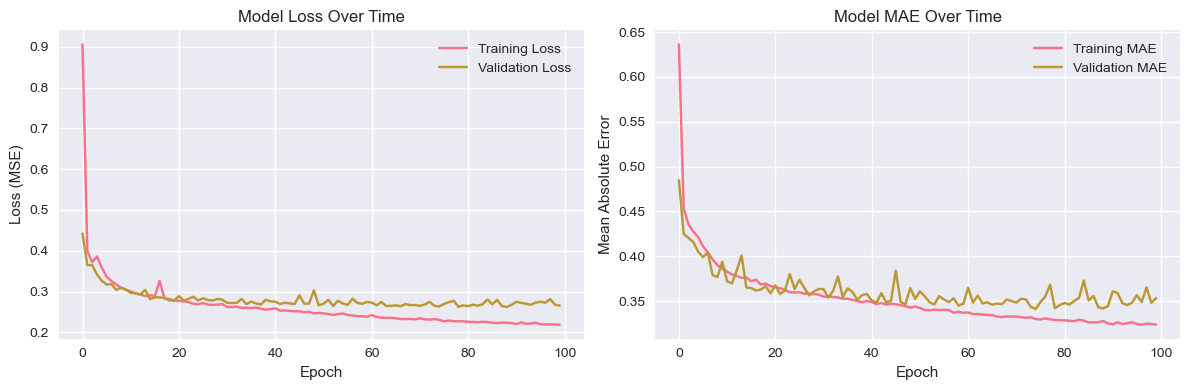

In [7]:
# Plot training curves
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# ==================================================== #
#        Model Evaluation on Test Set
# ==================================================== #
# Evaluate model on test set
test_results = model.evaluate(X_test_scaled, y_test, verbose=0)
print("\nTest Results:")
print(f"Test Loss (MSE): {test_results[0]:.4f}")
print(f"Test MAE: {test_results[1]:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate additional metrics
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDetailed Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


Test Results:
Test Loss (MSE): 0.2889
Test MAE: 0.3603
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step

Detailed Metrics:
Root Mean Squared Error (RMSE): 0.5375
R-squared Score (R²): 0.7863


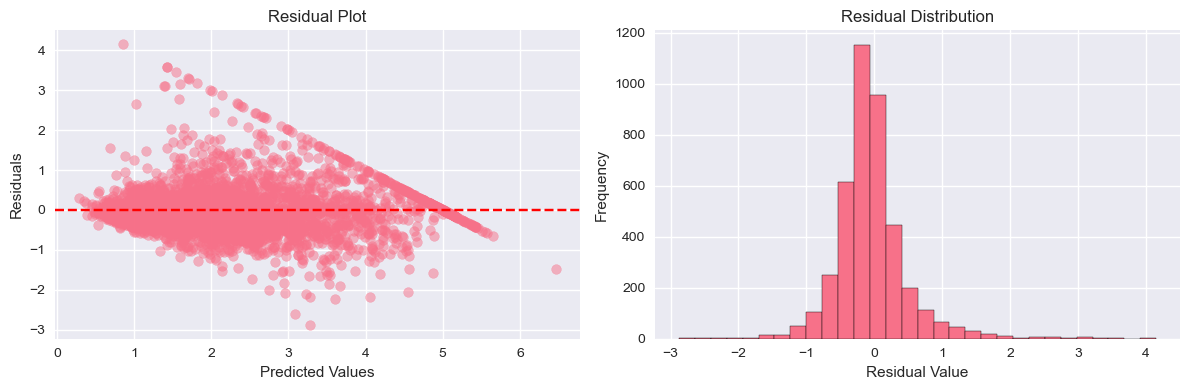


Residual Analysis:
Mean of Residuals: -0.0448
Std of Residuals: 0.5357


In [9]:
# ==================================================== #
#        Residual Analysis
# ==================================================== #
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(12, 4))

# Residual scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Residual distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residual Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics of residuals
print("\nResidual Analysis:")
print(f"Mean of Residuals: {np.mean(residuals):.4f}")
print(f"Std of Residuals: {np.std(residuals):.4f}")